In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import tqdm
from scipy.io import loadmat
from joblib import Parallel, delayed

# TACTILE DATA PREPERATION

This code converts non-uniformly distributed tactile data into rectangular shape tactile data: (39,1) -> (9,7)

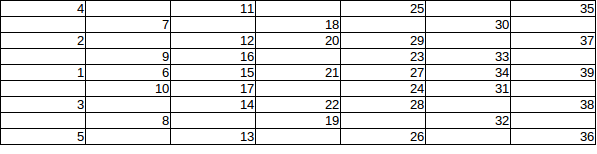

In [2]:
### give path to original spike data
path = "/home/tasbolat/some_python_examples/diag_data/batch2_final/"
save_dir = "/home/tasbolat/some_python_examples/data_batch2_final_VT_SNN/tact_rpg_data/"

In [3]:
import os
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

### Test one sample

In [4]:
class TrajStartEnd():
    def __init__(self, obj_name, path):
        self.path = path
        self.obj_name = obj_name
        self.obj_path = self.path + 'traj_start_ends/' + obj_name + '.startend'
        self.traj_start_end = np.array(open(self.obj_path, "r").read().split(" ")).astype(float) 

In [5]:
# obj_name = "110-c_coffee_can_02"
# df = pd.read_csv(
#         path + "aces_recordings/"+ obj_name + '.tact',
#         delimiter=" ",
#         names=["polarity", "cell_index", "timestamp"],
#         dtype={'polarity': int, 'cell_index': int, 'timestamp': float}
#     )

# trajStartEnd = TrajStartEnd(obj_name, path)
# df = df[ (df.timestamp <= (6.5+trajStartEnd.traj_start_end[3])) & (df.timestamp > trajStartEnd.traj_start_end[3])]
# df.timestamp = df.timestamp - trajStartEnd.traj_start_end[0]

In [6]:
import pickle
[right_map, left_map] = pickle.load(open('mappings.pkl', 'rb'))

In [7]:
# mapping indices
map_to_grid = {
    1:[4,0],
    2:[2,0],
    3:[6,0],
    4:[0,0],
    5:[8,0],
    7:[1,1],
    9:[3,1],
    6:[4,1],
    10:[5,1],
    8:[7,1],
    11:[0,2],
    12:[2,2],
    16:[3,2],
    15:[4,2],
    17:[5,2],
    14:[6,2],
    13:[8,2],
    18:[1,3],
    20:[2,3],
    21:[4,3],
    22:[6,3],
    19:[7,3],
    25:[0,4],
    29:[2,4],
    23:[3,4],
    27:[4,4],
    28:[6,4],
    24:[5,4],
    26:[8,4],
    30:[1,5],
    33:[3,5],
    34:[4,5],
    31:[5,5],
    32:[7,5],
    35:[0,6],
    37:[2,6],
    39:[4,6],
    38:[6,6],
    36:[8,6]
}

In [8]:
# aaa = {
# 'fake': list( map_to_grid.keys() ),
# 'values': list( map_to_grid.values() )
# }

In [9]:
#right_map

In [10]:
def create_space(x):
    return map_to_grid[x][0], map_to_grid[x][1]
# def create_space2(x):
#     return map_to_grid[x][0], map_to_grid[x][1]

In [11]:
#df.head()

In [12]:
# df1 = df[df.cell_index <=40]
# df2 = df[df.cell_index > 40]
# df1 = df1.reset_index(drop=True)
# df2 = df2.reset_index(drop=True)
# df1.cell_index = df1.cell_index.map(left_map)
# df2.cell_index = df2.cell_index.map(right_map)
# a1 = np.array(df1.cell_index.apply(create_space).tolist())
# a2 = np.array(df2.cell_index.apply(create_space).tolist())
# df1 = df1.assign(x = a1[:,0]).assign(y=a1[:,1])
# df2 = df2.assign(x = a2[:,0]).assign(y=a2[:,1])
# df1=df1.reindex(columns=['x', 'y', 'timestamp', 'polarity'])
# df2=df2.reindex(columns=['x', 'y', 'timestamp', 'polarity'])

As shown above cell index is mapped into x and y coordinates

### Do for all objs

In [13]:
# batch2
list_of_objects2 = [
    "107-a_pepsi_bottle",
    "107-b_pepsi_bottle",
    "107-c_pepsi_bottle",
    "107-d_pepsi_bottle",
    "107-e_pepsi_bottle",
    "108-a_tuna_fish_can",
    "108-b_tuna_fish_can",
    "108-c_tuna_fish_can",
    "108-d_tuna_fish_can",
    "108-e_tuna_fish_can",
    "109-a_soymilk",
    "109-b_soymilk",
    "109-c_soymilk",
    "109-d_soymilk",
    "109-e_soymilk",
    "110-a_coffee_can",
    "110-b_coffee_can",
    "110-c_coffee_can",
    "110-d_coffee_can",
    "110-e_coffee_can",
]

In [14]:
overall_count = -1
for obj in tqdm.tqdm(list_of_objects2):
    for i in range(1,16):
        overall_count+=1
        str_i = str(i)
        if i < 10:
            str_i = '0' + str_i
        obj_name = obj + "_" + str_i
        # read data
        df = pd.read_csv(
            path + "aces_recordings/"+ obj_name + '.tact',
            delimiter=" ",
            names=["polarity", "cell_index", "timestamp"],
            dtype={'polarity': int, 'cell_index': int, 'timestamp': float}
        )
        
        trajStartEnd = TrajStartEnd(obj_name, path)
        df = df[ (df.timestamp <= (6.5+trajStartEnd.traj_start_end[3])) & (df.timestamp > trajStartEnd.traj_start_end[3])]
        df.timestamp = df.timestamp - trajStartEnd.traj_start_end[0]
        df.loc[df.polarity==0, 'polarity']=-1
        
        df1 = df[df.cell_index <=40]
        df2 = df[df.cell_index > 40]
        df1 = df1.reset_index(drop=True)
        df2 = df2.reset_index(drop=True)
        df1.cell_index = df1.cell_index.map(left_map)
        df2.cell_index = df2.cell_index.map(right_map)
        a1 = np.array(df1.cell_index.apply(create_space).tolist())
        a2 = np.array(df2.cell_index.apply(create_space).tolist())
        df1 = df1.assign(x = a1[:,0]).assign(y=a1[:,1])
        df2 = df2.assign(x = a2[:,0]).assign(y=a2[:,1])
        df1=df1.reindex(columns=['x', 'y', 'timestamp', 'polarity'])
        df2=df2.reindex(columns=['x', 'y', 'timestamp', 'polarity'])
        
        np.save(save_dir + str(overall_count) + '_left.npy', df1.values)
        np.save(save_dir + str(overall_count) + '_right.npy', df2.values)

100%|██████████| 20/20 [00:06<00:00,  3.05it/s]
